# Plot the cross-component spectra of a high-Q glider recorded on a station

In [31]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp
from numpy import geomspace, meshgrid, flip, pi

from utils_basic import get_unique_stations, power2db, time2filename
from utils_basic import ROOTDIR_GEO as rootdir
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import get_scales_and_freqs, get_stream_cross_component_spectra
from utils_plot import plot_cwt_cross_component_spectra, save_figure

In [32]:
# Inputs
## Input data
starttime = "2020-01-13T20:01:01.5Z"
dur = 10.0
station = "B20"

## Preprocessing
deci_factor = 2 # Decimation factor

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
min_scales = 5
max_sacale = 50
num_scales = 128

## Plotting
cohe_threshold = 0.8
power_threshold = 30.0
freqlim_plot = (30.0, 100.0)

dbmin = 0.0
dbmax = 50.0

In [33]:
# Read and process the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=station, normalize=True, decimate=True, decimate_factor=deci_factor)

In [34]:
# Compute the component cross spectra
scales, freqs = get_scales_and_freqs(wavelet, center_freq, bandwidth, min_scales, max_sacale, num_scales)
specs, cross_specs = get_stream_cross_component_spectra(stream, wavelet, bandwidth, center_freq, scales)

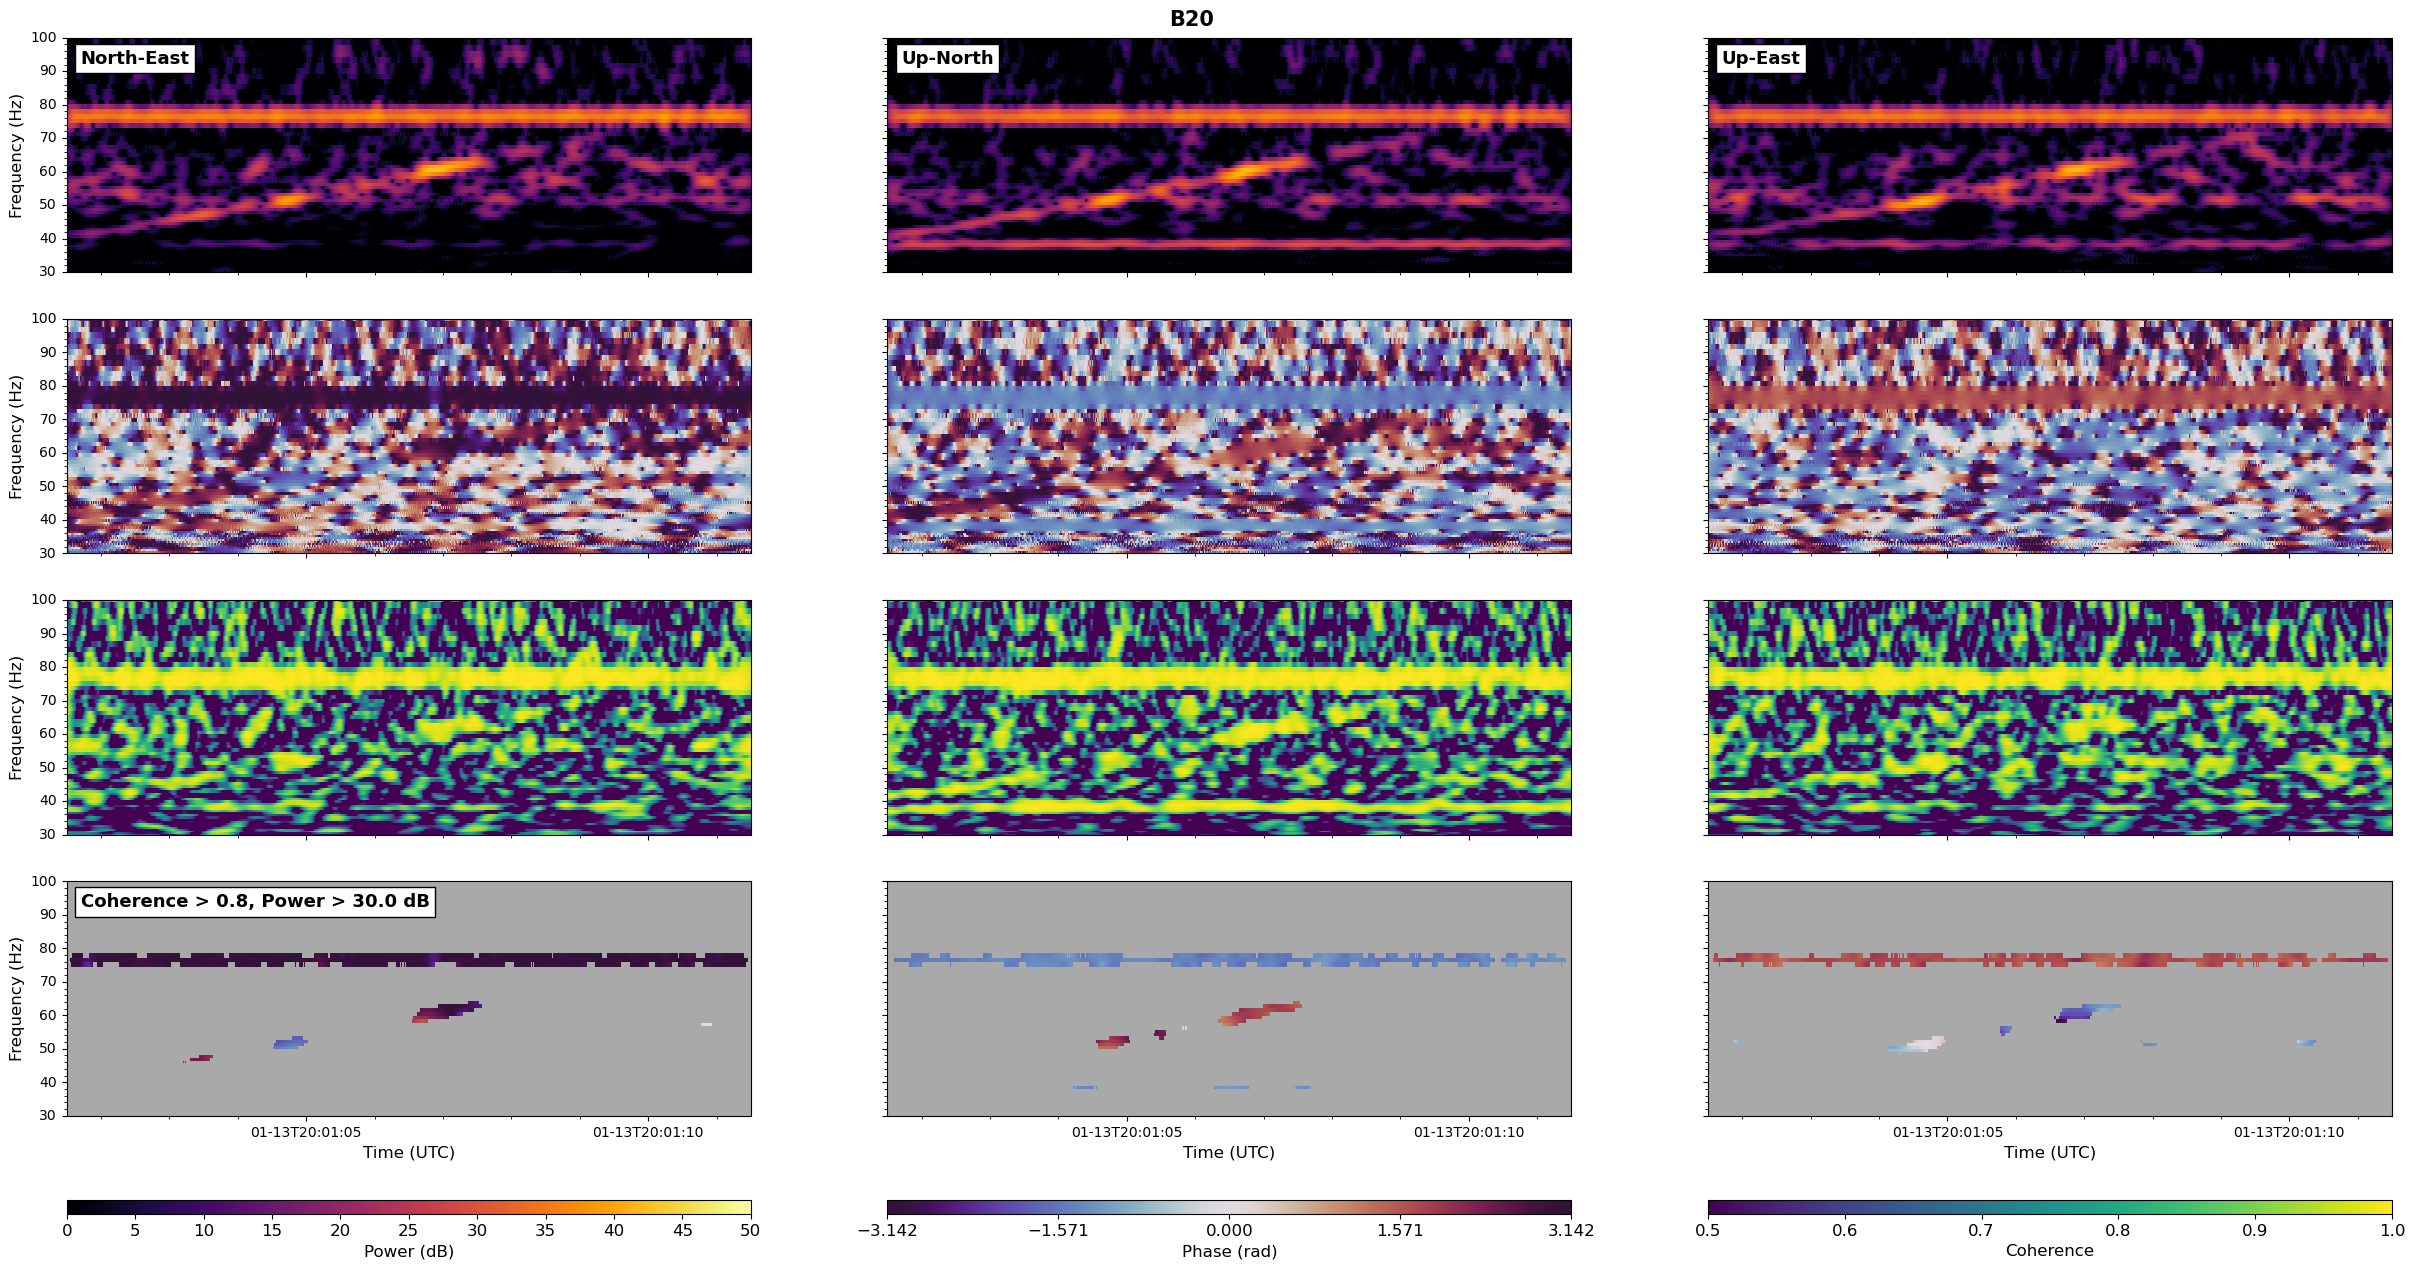

In [35]:
# Plot the cross spectra
fig, axes, power_cbar, phase_cbar, cohe_cbar = plot_cwt_cross_component_spectra(cross_specs, station, freqlim=freqlim_plot, dbmin=dbmin, dbmax=dbmax, cohe_threshold=cohe_threshold, power_threshold=power_threshold)

In [36]:
# Save the figure
timestr = time2filename(starttime)
figname = f"high_q_glider_cross_component_spectra_{timestr}_{station}.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/high_q_glider_cross_component_spectra_20200113T200101_B20.png
